In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
hdf=pd.read_csv("HeartData.csv")
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
hdf1=hdf.drop(['sex','cp','fbs','restecg','exange','slope','ca','tha','target'],axis=1)
hdf1

,age,trestbps,chol,thalach,olpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


## Correlation Matrix

In [5]:
# Correlation Matrix
corrMatrix=hdf1.corr()
corrMatrix

,age,trestbps,chol,thalach,olpeak
age,1.000000,0.284946,0.208950,-0.393806,0.203805
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171
chol,0.208950,0.130120,1.000000,-0.003432,0.046564
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085
olpeak,0.203805,0.189171,0.046564,-0.343085,1.000000


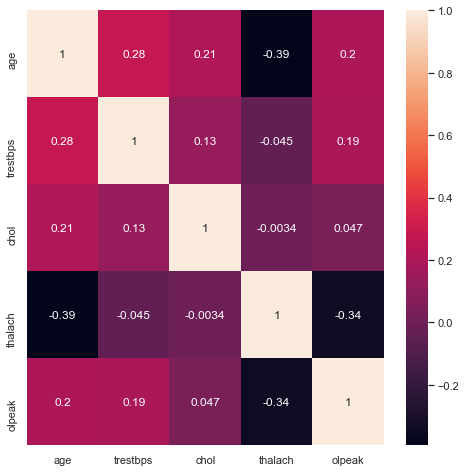

In [7]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

## Chi-Square test for association

In [9]:
# Contingency Table of slope and thal
contTable=pd.crosstab(index=hdf['slope'],columns=hdf['tha'])
contTable

tha,3,6,7,?
slope,,,,
1,102,2,37,1
2,56,14,70,0
3,8,3,10,0


In [10]:
# Chi-square test for independence of slope and thal
import scipy.stats as st
st.chi2_contingency(contTable)

(36.86939995718474,
 1.8671770757876484e-06,
 6,
 array([[7.77953795e+01, 8.90429043e+00, 5.48316832e+01, 4.68646865e-01],
        [7.66996700e+01, 8.77887789e+00, 5.40594059e+01, 4.62046205e-01],
        [1.15049505e+01, 1.31683168e+00, 8.10891089e+00, 6.93069307e-02]]))

In [31]:
# Pvalue<0.05: Reject Ho i.e. There is association between slope and thal

In [11]:
contTable1=pd.crosstab(index=hdf['sex'],columns=hdf['cp'])
contTable1

cp,1,2,3,4
sex,,,,
0,4,18,35,40
1,19,32,51,104


In [13]:
# Chi-square test for independence of sex and cp
#st.chi2_contingency(contTable1)

In [13]:
contTable2=pd.crosstab(index=hdf['restecg'],columns=hdf['exange'])
contTable2

exange,0,1
restecg,,
0,108,43
1,2,2
2,94,54


In [14]:
# Chi-square test for independence of restecg and exang
st.chi2_contingency(contTable2)

(2.733000468684148,
 0.2549978323770305,
 2,
 array([[101.66336634,  49.33663366],
        [  2.69306931,   1.30693069],
        [ 99.64356436,  48.35643564]]))

## Logistics Regression Model

In [40]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exange    303 non-null    int64  
 9   olpeak    303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  tha       303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
hdf.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exange        int64
olpeak      float64
slope         int64
ca            int64
tha           int64
target        int64
dtype: object

In [48]:
def clean_dataset(hdf):
    assert isinstance(hdf, pd.DataFrame)
    hdf.dropna(inplace=True)
    indices_to_keep = ~hdf.isin([np.nan, np.inf, -np.inf]).any(1)
    return hdf[indices_to_keep].astype(np.int64)

In [49]:
hdf3=clean_dataset(hdf)
hdf3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,target
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1


In [50]:
hdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exange    303 non-null    int64
 9   olpeak    303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  tha       303 non-null    int64
 13  target    303 non-null    int64
dtypes: int64(14)
memory usage: 35.5 KB


In [51]:
x=hdf.iloc[:,:-1]
y=hdf.iloc[:,-1]
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exange  olpeak  \
 0     63    1   1       145   233    1        2      150       0     2.3   
 1     67    1   4       160   286    0        2      108       1     1.5   
 2     67    1   4       120   229    0        2      129       1     2.6   
 3     37    1   3       130   250    0        0      187       0     3.5   
 4     41    0   2       130   204    0        2      172       0     1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...     ...     ...   
 298   45    1   1       110   264    0        0      132       0     1.2   
 299   68    1   4       144   193    1        0      141       0     3.4   
 300   57    1   4       130   131    0        0      115       1     1.2   
 301   57    0   2       130   236    0        2      174       0     0.0   
 302   38    1   3       138   175    0        0      173       0     0.0   
 
      slope  ca  tha  
 0        3   0    6  
 1        2   3    3  
 2   

In [52]:
# Splitting of dataset as training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha
203,64,0,3,140,313,0,0,133,0,0.2,1,0,7
187,66,1,2,160,246,0,0,120,1,0.0,2,3,6
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7
56,50,1,3,140,233,0,0,163,0,0.6,2,1,7
250,57,1,4,110,201,0,0,126,1,1.5,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,45,1,2,128,308,0,2,170,0,0.0,1,0,3
218,64,0,4,130,303,0,0,122,0,2.0,2,2,3
240,41,1,2,110,235,0,0,153,0,0.0,1,0,3
44,61,0,4,130,330,0,2,169,0,0.0,1,0,3


In [53]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)
X_test

array([[ 6.95092158e-01,  6.50791373e-01, -2.26296691e+00,
         1.03777263e-01, -2.66119499e-01, -4.31595308e-01,
        -9.77564164e-01, -2.28001803e-01, -7.29140295e-01,
         1.29541595e+00,  6.24946957e-01,  1.40009240e+00,
        -9.06736055e-01],
       [ 2.55321433e-01,  6.50791373e-01, -1.68748966e-01,
         1.00473143e+00, -2.44032994e+00,  2.31698534e+00,
        -9.77564164e-01,  1.01892331e+00, -7.29140295e-01,
        -7.15751073e-01, -9.83959038e-01,  3.44571027e-01,
         1.15364071e+00],
       [ 1.13486288e+00,  6.50791373e-01,  8.78360005e-01,
        -1.24765399e+00,  1.57225962e-02, -4.31595308e-01,
         1.03580203e+00,  3.50927715e-01, -7.29140295e-01,
        -3.80556570e-01, -9.83959038e-01,  1.40009240e+00,
         6.38546517e-01],
       [-5.14277335e-01, -1.53659074e+00, -1.68748966e-01,
        -6.84557637e-01, -5.68093172e-01, -4.31595308e-01,
        -9.77564164e-01,  3.50927715e-01, -7.29140295e-01,
         4.57429689e-01,  6.24946957e

In [54]:
# Model on training dataset
from sklearn.linear_model import LogisticRegression
LRclassifier=LogisticRegression()

LRclassifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# Predicted values
y_pred=LRclassifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[31,  2],
       [ 7, 21]], dtype=int64)

## VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
X=hdf3.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha
0,63,1,1,145,233,1,2,150,0,2,3,0,6
1,67,1,4,160,286,0,2,108,1,1,2,3,3
2,67,1,4,120,229,0,2,129,1,2,2,2,7
3,37,1,3,130,250,0,0,187,0,3,3,0,3
4,41,0,2,130,204,0,2,172,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,7
299,68,1,4,144,193,1,0,141,0,3,2,2,7
300,57,1,4,130,131,0,0,115,1,1,2,1,7
301,57,0,2,130,236,0,2,174,0,0,2,1,3


In [59]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
print(vif)

          VIF
0   42.620189
1    3.878178
2   13.609246
3   60.835721
4   26.376742
5    1.243132
6    2.153974
7   34.565060
8    2.049546
9    2.484920
10  11.434229
11   2.036014
12  10.635127


## PCA

In [60]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_stan=scaler.fit_transform(X)
x_stan

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.72842926,  0.65528247],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.48585324, -0.895894  ],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.41442574,  1.17234129],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.34299824,  1.17234129],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.34299824, -0.895894  ],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
         0.34299824, -0.895894  ]])

In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
X_pca=pca.fit_transform(x_stan)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)
D=pd.DataFrame(X_pca)
D

[0.23475562 0.12303794 0.09573907 0.08400431 0.07602281 0.0676894
 0.065854   0.06044902 0.05396003 0.04303463 0.03533776 0.03156059
 0.02855483]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.175015,0.941577,3.115070,2.396204,-0.092952,-0.161359,0.875881,0.285370,-1.664054,-0.392939,-0.169307,-0.504386,-0.045231
1,3.132133,1.476753,-0.456226,-0.933203,0.140133,-0.790703,0.119315,-1.021302,0.578991,1.452541,0.917417,0.845411,1.272579
2,3.058372,-0.614946,-0.361538,-0.670296,-0.046703,-1.153219,0.335210,-0.232888,0.054932,0.409329,-0.399077,-0.876247,-0.207611
3,-0.504247,-1.404572,0.304475,2.849033,-0.768391,0.042844,-0.720526,2.239020,0.467881,0.202779,1.387700,-0.289319,0.789802
4,-2.326077,0.377966,-0.100297,1.206949,-0.796409,-0.383387,0.613959,0.070464,1.050689,0.511721,-0.843699,0.339363,-1.052004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.666085,-1.468150,0.589182,1.075460,0.257888,-0.684751,-0.987983,0.654894,-2.235302,0.001236,-0.738384,1.013884,-0.529551
299,2.642486,0.027457,2.191486,-0.010874,2.129442,0.329258,0.294838,1.174410,0.775532,-0.831364,0.718078,-0.659493,-0.670241
300,1.924038,-2.371350,-0.180760,0.028964,1.484974,0.341533,0.213356,-1.265060,0.431037,0.157576,-0.505306,-0.052091,0.179141
301,-1.266078,1.495670,-0.139981,0.959446,-0.138506,-0.984454,0.489368,0.135651,0.233639,0.293296,-1.163613,-0.482722,0.807206


In [65]:
#corrMatrix=D.corr()
#orrMatrix

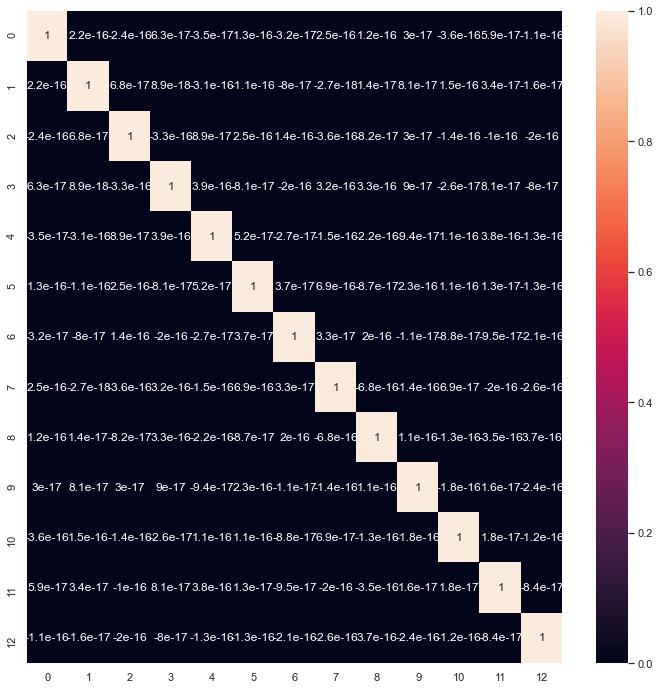

In [63]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(x)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
total_explained_variation=explained_variance.sum()*100
total_explained_variation

## Scree Plot

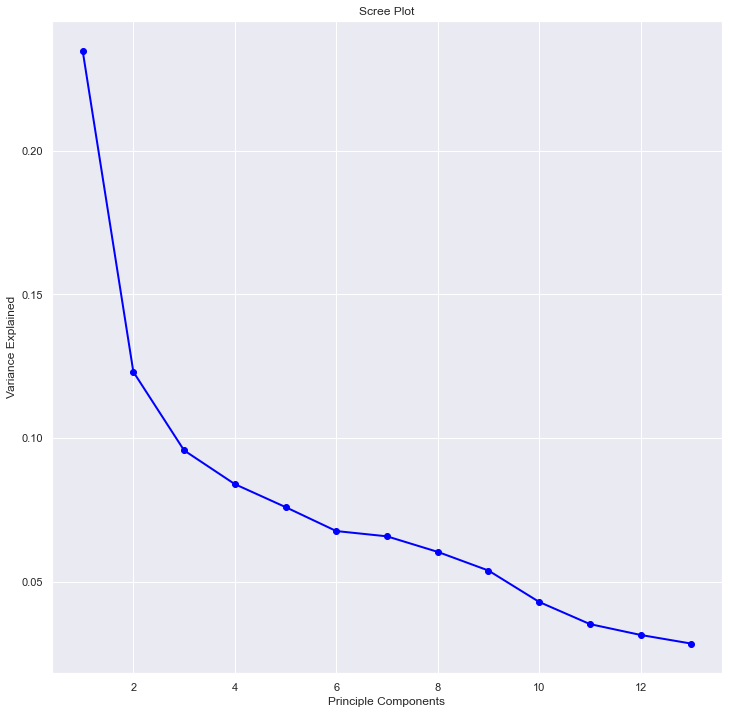

In [64]:
PCA=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(PCA,explained_variance,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principle Components')
plt.ylabel('Variance Explained')
plt.show()